<div style="color:red; background-color:#F; padding: 20px; border-radius: 15px; font-size: 400%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> Sentiment Analysis [ Arabic Reviews ] </div>


# **Introduction**
* ****Normalization****
* **Tokenization**
* **Stop Words**
* **Noice Removal**
* **Splelling Correction**
* **Handle Mixed Languages**
* **Putting The Final Touches**
* **TF IDF Vectorizer**
* **Models**

I will go through all the key and fundament concepts of NLP and Sequence Models, which you will learn in this notebook. 
![Sentiment Analysis](https://fiverr-res.cloudinary.com/images/t_main1,q_auto,f_auto,q_auto,f_auto/gigs/121192228/original/677c209a0a064cb9253973d3663684acf91dab84/do-nlp-projects-with-python-nltk-gensim.jpg)


Let's get started with code without furthur ado.

<font color='red'> If you find this notebook helpful, please leave a UPVOTE to encourage me</font>

  <div style="color:#FF5733; background-color:#F; padding: 20px; border-radius: 15px; font-size: 400%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📂Importing Dependencies📂 </div>



   We shall start by importing all the neccessary libraries. I will explain the exact use of each library later in this notebook.

In [1]:
!pip install camel-tools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 556.4/556.4 kB 14.9 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.5/124.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 79.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.8/401.8 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 45.6 MB/s eta 0:00:0000:01:00:01
  Created wheel for camel-kenlm: filename=camel_kenlm-2024.5.6-cp310-cp310-linux_x86_64.whl size=592940 sha256=b95eb8306091a71ae2ae7e7cc9c9ed2daf296f818307a5690f27df1c1c16d3ab
  Stored in directory: /root/.cache/pip/wheels/2b/93/ff/ac84dae74c91ffe3e1c344a71f991946eacc79eada61cb703f

# **Import Libraries**

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import spacy
import re
import nltk
from nltk.corpus import stopwords

  <div style="color:#FF5733; background-color:#F; padding: 20px; border-radius: 15px; font-size: 300%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🛠Dataset Preprocessing🛠 </div>
  
  
In this notebook, I am using **Sentiment-140** from [Kaggle](https://www.kaggle.com/kazanova/sentiment140). It contains a labels data of 1.6 Million Tweets and I find it a good amount of data to train our model.

In [4]:
df = pd.read_csv('/kaggle/input/arabic-customer-reviews/Final_Data.csv')

In [5]:
df.shape

(40046, 3)

In [6]:
df.head()

,review_description,rating,company
0,رائع,positive,talbat
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,positive,talbat
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,negative,talbat
3,لماذا لا يمكننا طلب من ماكدونالدز؟,negative,talbat
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,negative,talbat


In [7]:
df.describe(include = 'all').T

,count,unique,top,freq
review_description,40045,39003,ممتاز,16
rating,40046,3,positive,23921
company,40046,12,talbat,32073


In [8]:
filtered_df = df[df['company'] == 'talbat']
df['company'] = filtered_df['company']
df = df.dropna(subset=['company'])
df['company'].unique()

array(['talbat'], dtype=object)

In [9]:
df = df[df['rating'] != 'neutral']
df['rating'].unique()

array(['positive', 'negative'], dtype=object)

In [10]:
df.isnull().sum()

review_description    1
rating                0
company               0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.duplicated().sum()

1

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
# A describe for our dataset

for i in list(df.columns):

    print("\n ************ "+i+" ************\n")
    print("\n",df[i].value_counts())
    print("\n",df[i].describe(),"\n")


 ************ review_description ************


 review_description
جامد جدا                                                                               2
رائع                                                                                   1
البرنامج حاط كل المطاعم مفتوحة و لما تدخل يكتب مشغول استمرت المشكلة ٣اسابيع \n😲        1
اسرع موقع طلباات ممتاز اهنيكم                                                          1
قوووي البرنامج                                                                         1
                                                                                      ..
حرمية ومفيش مصدقية                                                                     1
انا مشوفتش عرض ال ٧٥ ده خالص وكل ما ادخل واعمل اوردر مافيش مكان نكتب فيه الكود اصلا    1
احلى اكل في العالم صلباص                                                               1
Time Is 😐😐😐Good                                                                        1
ولكن ياليت لو كل الأكلات مدعومة بالصور با

In [15]:
# Label encoding using the provided mapping
label_mapping = {'negative': 1, 'positive': 2}
df['rating'] = df['rating'].map(label_mapping)

In [16]:
df['review_description'] = df['review_description'].astype(str)
df['rating'] = df['rating'].astype(int)
df['company'] = df['company'].astype(str)
df['company'].replace('talbat','Talabat', inplace= True)
df.head()

/tmp/ipykernel_24/577467581.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['company'].replace('talbat','Talabat', inplace= True)


,review_description,rating,company
0,رائع,2,Talabat
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,2,Talabat
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,1,Talabat
3,لماذا لا يمكننا طلب من ماكدونالدز؟,1,Talabat
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,1,Talabat


Looks like we have a nasty data in text. Because in general we use lot of punctuations and other words without any contextual meaning. It have no value as feature to the model we are training. So we need to get rid of them.

# *****Text Preprocessing*****
Tweet texts often consists of other user mentions, hyperlink texts, emoticons and punctuations. In order to use them for learning using a Language Model. We cannot permit those texts for training a model. So we have to clean the text data using various preprocessing and cleansing methods. Let's continue
![Data Science Meme](https://miro.medium.com/max/800/1*Xhm9c9qDfXa3ZCQjiOvm_w.jpeg)


## **1- Normalization**
*  Normalization in Arabic Natural Language Processing (NLP) refers to the process of standardizing and simplifying        the text to reduce variations and ambiguities while preserving the meaning. It is particularly important in             Arabic because of the language's rich morphology, multiple forms of the same word, and presence of diacritics and       special characters.Here are the main components of Arabic text normalization:

* Examples of Standardization:

* *  Example: إسلام, آمال → اسلام, امال
ى → ي
* * Example: على → علي
ة → ه (or ت in some cases)
* * Example: مدرسة → مدرسه
* Why Standardize? This reduces variations caused by the same letter appearing in different forms. 

In [17]:
from camel_tools.utils.dediac import dediac_ar
import re

def normalize_arabic(text):
    # Check if the input is a string
    if isinstance(text, str):
        text = re.sub("[إأآا]", "ا", text)
        text = re.sub("ى", "ي", text)
        text = re.sub("ؤ", "ء", text)
        text = dediac_ar(text)
        return text
df['review_description'] = df['review_description'].apply(normalize_arabic)

ModuleNotFoundError: No module named 'camel_tools'

## **2- Tokenization**
*  Tokenization is the process of breaking text into smaller units, called tokens, which can be words, subwords, or characters. It is a crucial preprocessing step in Natural Language Processing (NLP) for tasks like text classification, sentiment analysis, or machine translation.

* Tokenization in Arabic poses unique challenges due to the language's complex morphology, rich vocabulary, and the presence of prefixes, suffixes, and clitics.

In [18]:
import spacy
import pandas as pd

# Load the spaCy model
nlp = spacy.blank("ar")

def tokenize_column(df, column_name):

    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame.")

    # Create a new column for tokenized text
    tokenized_column = f"{column_name}_tokenized"
    df[tokenized_column] = df[column_name].apply(lambda text: [token.text for token in nlp(str(text))])

    return df

# Example usage
tokenized_df = tokenize_column(df, 'review_description')
df.head()

,review_description,rating,company,review_description_tokenized
0,رائع,2,Talabat,[رائع]
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,2,Talabat,"[برنامج, رائع, جدا, يساعد, على, تلبيه, الاحتيا..."
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,1,Talabat,"[التطبيق, لا, يغتح, دائما, بيعطيني, لا, يوجد, ..."
3,لماذا لا يمكننا طلب من ماكدونالدز؟,1,Talabat,"[لماذا, لا, يمكننا, طلب, من, ماكدونالدز, ؟]"
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,1,Talabat,"[البرنامج, بيظهر, كل, المطاعم, و, مغلقه, مع, ا..."


## **3- Stopword Removal**
* Stop Words are commonly used words in a language that carry little semantic meaning, such as "the," "is," "in" in English or "هذا," "لكن," "لم" in Arabic. Removing these words helps reduce noise in text data and focuses on meaningful content during NLP tasks like text classification, sentiment analysis, and machine translation.

* We Remove stop words without *****{"لم", "لن", "لا", "لكن"}*****

In [19]:
# Download required NLTK data if not already present
try:
    stop_words = set(stopwords.words('arabic'))
except LookupError:
    import nltk
    nltk.download('stopwords')
    stop_words = set(stopwords.words('arabic'))

# Define custom stop words to exclude
excluded_stopwords = {"لم", "لن", "لا", "لكن"}

# Update the stop words set by removing the excluded words
stop_words = stop_words - excluded_stopwords


def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words and token.strip() != '']


df['review_description_tokenized_nostopwords'] = df['review_description_tokenized'].apply(remove_stopwords)
df.head()

,review_description,rating,company,review_description_tokenized,review_description_tokenized_nostopwords
0,رائع,2,Talabat,[رائع],[رائع]
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,2,Talabat,"[برنامج, رائع, جدا, يساعد, على, تلبيه, الاحتيا...","[برنامج, رائع, جدا, يساعد, تلبيه, الاحتياجات, ..."
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,1,Talabat,"[التطبيق, لا, يغتح, دائما, بيعطيني, لا, يوجد, ...","[التطبيق, لا, يغتح, دائما, بيعطيني, لا, يوجد, ..."
3,لماذا لا يمكننا طلب من ماكدونالدز؟,1,Talabat,"[لماذا, لا, يمكننا, طلب, من, ماكدونالدز, ؟]","[لماذا, لا, يمكننا, طلب, ماكدونالدز, ؟]"
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,1,Talabat,"[البرنامج, بيظهر, كل, المطاعم, و, مغلقه, مع, ا...","[البرنامج, بيظهر, المطاعم, مغلقه, انها, بتكون,..."


In [20]:
# from spacy.lang.en.stop_words import STOP_WORDS as EN_STOPWORDS
# from spacy.lang.ar.stop_words import STOP_WORDS as AR_STOPWORDS

# def remove_stopwords_column(df, column_name):

#     # Combine Arabic and English stopword lists
#     combined_stopwords = AR_STOPWORDS.union(EN_STOPWORDS)

#     # Check if the column exists
#     if column_name not in df.columns:
#         raise ValueError(f"Column '{column_name}' not found in DataFrame.")

#     # Create a new column for text without stopwords
#     cleaned_column = f"{column_name}_no_stopwords"
#     df[cleaned_column] = df[column_name].apply(lambda tokens: [token for token in tokens if token.lower() not in combined_stopwords])

#     return df

# # Example usage

# cleaned_df = remove_stopwords_column(df, 'review_description_tokenized')

# df.head()


## **4- Noice Removal**
* Noise removal involves cleaning text by eliminating unwanted characters, symbols, or irrelevant elements that can negatively affect NLP tasks. Arabic text often includes additional challenges like diacritics, special characters, and mixed-language content.

In [21]:
import string
import re
import pandas as pd

def remove_noise_and_emojis(df, column_name, additional_noise=None):
    """
    Removes noise (punctuation, emojis, and other specified tokens) from a column in a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to clean.
        additional_noise (set): Optional. Additional tokens to consider as noise.

    Returns:
        pd.DataFrame: A new DataFrame with an additional column for cleaned text.
    """
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame.")

    # Define noise (punctuation + emojis + additional tokens)
    punctuation = set(string.punctuation)
    emoji_pattern = re.compile("[\U0001F600-\U0001F64F"  # emoticons
                               "\U0001F300-\U0001F5FF"  # symbols & pictographs
                               "\U0001F680-\U0001F6FF"  # transport & map symbols
                               "\U0001F700-\U0001F77F"  # Alchemical symbols
                               "\U0001F780-\U0001F7FF"  # Geometric Shapes
                               "\U0001F800-\U0001F8FF"  # Supplemental Arrows
                               "\U0001F900-\U0001F9FF"  # Supplemental Symbols
                               "\U0001FA00-\U0001FA6F"  # Chess Symbols
                               "\U0001FA70-\U0001FAFF"  # Symbols & Pictographs Extended-A
                               "\U00002702-\U000027B0"  # Dingbats
                               "\U000024C2-\U0001F251"  # Enclosed characters
                               "]+", flags=re.UNICODE)
    
    noise = punctuation.union(additional_noise or set())

    # Create a new column for cleaned text
    cleaned_column = f"{column_name}_cleaned"
    df[cleaned_column] = df[column_name].apply(
        lambda tokens: [token for token in tokens if token not in noise and not emoji_pattern.search(token)]
    )
    
    return df

# Define additional noise tokens if needed
additional_noise = {"؟"}

# Apply noise and emoji removal
cleaned_df = remove_noise_and_emojis(df, 'review_description_tokenized_nostopwords', additional_noise=additional_noise)

df.head()

,review_description,rating,company,review_description_tokenized,review_description_tokenized_nostopwords,review_description_tokenized_nostopwords_cleaned
0,رائع,2,Talabat,[رائع],[رائع],[رائع]
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,2,Talabat,"[برنامج, رائع, جدا, يساعد, على, تلبيه, الاحتيا...","[برنامج, رائع, جدا, يساعد, تلبيه, الاحتياجات, ...","[برنامج, رائع, جدا, يساعد, تلبيه, الاحتياجات, ..."
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,1,Talabat,"[التطبيق, لا, يغتح, دائما, بيعطيني, لا, يوجد, ...","[التطبيق, لا, يغتح, دائما, بيعطيني, لا, يوجد, ...","[التطبيق, لا, يغتح, دائما, بيعطيني, لا, يوجد, ..."
3,لماذا لا يمكننا طلب من ماكدونالدز؟,1,Talabat,"[لماذا, لا, يمكننا, طلب, من, ماكدونالدز, ؟]","[لماذا, لا, يمكننا, طلب, ماكدونالدز, ؟]","[لماذا, لا, يمكننا, طلب, ماكدونالدز]"
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,1,Talabat,"[البرنامج, بيظهر, كل, المطاعم, و, مغلقه, مع, ا...","[البرنامج, بيظهر, المطاعم, مغلقه, انها, بتكون,...","[البرنامج, بيظهر, المطاعم, مغلقه, انها, بتكون,..."


In [22]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 18.4 MB/s eta 0:00:0000:0100:01


## **5- Spelling Correction**

In [23]:
# to be done

## **6- Handle Mixed Languages**
* Handling mixed-language text, especially when it includes Arabic and another language like English (or Arabizi), is essential for accurately processing and analyzing real-world text data. Below is a structured approach to deal with mixed-language content in text preprocessing.

In [24]:
import re
import pandas as pd

def handle_mixed_languages(df, column_name):

    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame.")

    # Function to filter out Arabic words using regular expression
    def extract_arabic_words(tokens):
        # Check if the input is a list (already tokenized text)
        if isinstance(tokens, list):
            arabic_words = [word for word in tokens if re.search(r'[\u0600-\u06FF]', word)]
            return arabic_words
        else:
            raise ValueError(f"Expected list of tokens, got {type(tokens)}")

    # Apply the function to the specified column
    arabic_column = f"{column_name}_arabic_only"
    df[arabic_column] = df[column_name].apply(extract_arabic_words)

    return df

mixed_handling_df = handle_mixed_languages(df, 'review_description_tokenized_nostopwords_cleaned')

df.head()


,review_description,rating,company,review_description_tokenized,review_description_tokenized_nostopwords,review_description_tokenized_nostopwords_cleaned,review_description_tokenized_nostopwords_cleaned_arabic_only
0,رائع,2,Talabat,[رائع],[رائع],[رائع],[رائع]
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,2,Talabat,"[برنامج, رائع, جدا, يساعد, على, تلبيه, الاحتيا...","[برنامج, رائع, جدا, يساعد, تلبيه, الاحتياجات, ...","[برنامج, رائع, جدا, يساعد, تلبيه, الاحتياجات, ...","[برنامج, رائع, جدا, يساعد, تلبيه, الاحتياجات, ..."
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,1,Talabat,"[التطبيق, لا, يغتح, دائما, بيعطيني, لا, يوجد, ...","[التطبيق, لا, يغتح, دائما, بيعطيني, لا, يوجد, ...","[التطبيق, لا, يغتح, دائما, بيعطيني, لا, يوجد, ...","[التطبيق, لا, يغتح, دائما, بيعطيني, لا, يوجد, ..."
3,لماذا لا يمكننا طلب من ماكدونالدز؟,1,Talabat,"[لماذا, لا, يمكننا, طلب, من, ماكدونالدز, ؟]","[لماذا, لا, يمكننا, طلب, ماكدونالدز, ؟]","[لماذا, لا, يمكننا, طلب, ماكدونالدز]","[لماذا, لا, يمكننا, طلب, ماكدونالدز]"
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,1,Talabat,"[البرنامج, بيظهر, كل, المطاعم, و, مغلقه, مع, ا...","[البرنامج, بيظهر, المطاعم, مغلقه, انها, بتكون,...","[البرنامج, بيظهر, المطاعم, مغلقه, انها, بتكون,...","[البرنامج, بيظهر, المطاعم, مغلقه, انها, بتكون,..."


## **7- Putting The Final Touches**

In [25]:
df = df[['review_description', 'rating', 'company', 'review_description_tokenized_nostopwords_cleaned_arabic_only']]

In [26]:
df.rename(columns={'review_description_tokenized_nostopwords_cleaned_arabic_only': 'preprocessed_review_description'}, inplace=True)
df

/tmp/ipykernel_24/2062553966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'review_description_tokenized_nostopwords_cleaned_arabic_only': 'preprocessed_review_description'}, inplace=True)


,review_description,rating,company,preprocessed_review_description
0,رائع,2,Talabat,[رائع]
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,2,Talabat,"[برنامج, رائع, جدا, يساعد, تلبيه, الاحتياجات, ..."
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,1,Talabat,"[التطبيق, لا, يغتح, دائما, بيعطيني, لا, يوجد, ..."
3,لماذا لا يمكننا طلب من ماكدونالدز؟,1,Talabat,"[لماذا, لا, يمكننا, طلب, ماكدونالدز]"
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,1,Talabat,"[البرنامج, بيظهر, المطاعم, مغلقه, انها, بتكون,..."
...,...,...,...,...
32068,نتمنى اضافة مطاعم اخرى,2,Talabat,"[نتمنى, اضافة, مطاعم, اخرى]"
32069,البرنامج خرافي ،وبصراحة تعليقات الأخوان سليمة ...,2,Talabat,"[البرنامج, خرافي, ،, وبصراحة, تعليقات, الأخوان..."
32070,البرناامج تحفه واصل ابدااعك,2,Talabat,"[البرناامج, تحفه, واصل, ابدااعك]"
32071,رائع جداً للمدن الكبيرة، فقط لو يزيد عدد المطا...,2,Talabat,"[رائع, جداً, للمدن, الكبيرة, ،, فقط, يزيد, عدد..."


In [27]:
# Drop rows with empty lists in the 'preprocessed_review_description' column
df = df[df['preprocessed_review_description'].apply(lambda x: len(x) > 0)]

In [28]:
df

,review_description,rating,company,preprocessed_review_description
0,رائع,2,Talabat,[رائع]
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,2,Talabat,"[برنامج, رائع, جدا, يساعد, تلبيه, الاحتياجات, ..."
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,1,Talabat,"[التطبيق, لا, يغتح, دائما, بيعطيني, لا, يوجد, ..."
3,لماذا لا يمكننا طلب من ماكدونالدز؟,1,Talabat,"[لماذا, لا, يمكننا, طلب, ماكدونالدز]"
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,1,Talabat,"[البرنامج, بيظهر, المطاعم, مغلقه, انها, بتكون,..."
...,...,...,...,...
32068,نتمنى اضافة مطاعم اخرى,2,Talabat,"[نتمنى, اضافة, مطاعم, اخرى]"
32069,البرنامج خرافي ،وبصراحة تعليقات الأخوان سليمة ...,2,Talabat,"[البرنامج, خرافي, ،, وبصراحة, تعليقات, الأخوان..."
32070,البرناامج تحفه واصل ابدااعك,2,Talabat,"[البرناامج, تحفه, واصل, ابدااعك]"
32071,رائع جداً للمدن الكبيرة، فقط لو يزيد عدد المطا...,2,Talabat,"[رائع, جداً, للمدن, الكبيرة, ،, فقط, يزيد, عدد..."


In [29]:
df = df[['rating','preprocessed_review_description']]

## **8- TF IDF Vectorizer**

In [30]:
# prompt: make TF IDF

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'df' is your DataFrame with the preprocessed text data
# and 'preprocessed_review_description' column contains the list of tokens

# Join tokens back into strings for TF-IDF
df['preprocessed_review_description'] = df['preprocessed_review_description'].apply(lambda x: ' '.join(x))

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed text data
tfidf_matrix = vectorizer.fit_transform(df['preprocessed_review_description'])

# Now you have the TF-IDF matrix
tfidf_matrix.shape

/tmp/ipykernel_24/3097006755.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preprocessed_review_description'] = df['preprocessed_review_description'].apply(lambda x: ' '.join(x))


(28933, 36205)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'df' and 'tfidf_matrix' are defined from the previous code

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['rating'], test_size=0.2, random_state=42)

# Initialize and train an SVM model
svm_model = SVC(kernel='linear') # You can change the kernel if needed
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 0.8705719716606186
              precision    recall  f1-score   support

           1       0.86      0.76      0.81      2075
           2       0.87      0.93      0.90      3712

    accuracy                           0.87      5787
   macro avg       0.87      0.85      0.86      5787
weighted avg       0.87      0.87      0.87      5787



Confusion Matrix:
[[1581  494]
 [ 255 3457]]


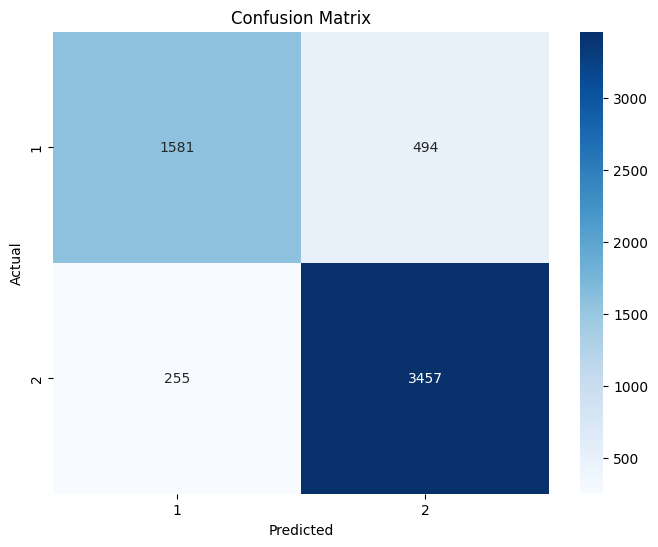

In [32]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' and 'y_pred' are available from the previous code

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, you can visualize the confusion matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
import joblib

# Save the SVM model
joblib.dump(svm_model, 'svm_text_classification_model.pkl')
print("Model saved successfully!")


Model saved successfully!


In [34]:
def load_and_predict(model_path, text, vectorizer):
    """
    Load a saved SVM model and use it to predict the class of a given text.

    Args:
        model_path (str): Path to the saved SVM model file.
        text (str): The input text to classify.
        vectorizer: The fitted TF-IDF vectorizer used during training.

    Returns:
        str: Predicted class for the input text.
    """
    # Load the saved model
    model = joblib.load(model_path)
    
    # Transform the text using the TF-IDF vectorizer
    text_tfidf = vectorizer.transform([text])
    
    # Predict the label
    prediction = model.predict(text_tfidf)
    
    return prediction[0]


In [36]:
# joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
# # Load the vectorizer
# tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# # Example text to classify
# new_text = "This product is amazing and works perfectly!"

# # Use the function to make predictions
# predicted_label = load_and_predict('svm_text_classification_model.pkl', new_text, tfidf_vectorizer)

# print(f"Predicted Class: {predicted_label}")

from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df['text'] contains the text data
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['preprocessed_review_description'])  # Fit and transform your text data

# Save the vectorizer
import joblib
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
print("TF-IDF Vectorizer saved successfully!")


TF-IDF Vectorizer saved successfully!


In [40]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Create and Save the Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=40000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['preprocessed_review_description'])  # Fit and transform your text data
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

# Step 2: Save the SVM Model (Assuming you already trained it)
joblib.dump(svm_model, 'svm_text_classification_model.pkl')

# Step 3: Define the Load and Predict Function
def load_and_predict(model_path, text, vectorizer):
    model = joblib.load(model_path)  # Load the saved model
    text_tfidf = vectorizer.transform([text])  # Transform text using TF-IDF
    prediction = model.predict(text_tfidf)  # Predict the class
    return prediction[0]

# Step 4: Load Vectorizer and Model to Classify New Text
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')
predicted_label = load_and_predict('svm_text_classification_model.pkl', 
                                   "This product is amazing and works perfectly!", 
                                   tfidf_vectorizer)

print(f"Predicted Class: {predicted_label}")


Predicted Class: 2
